# Micro-level data for the narchiver

_Nick Janetos_

_January 9th, 2016_

This document containts scratch work on viewing micro-level data in the narchiver.

In [85]:
# Imports and convenient function
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Load all the data
exec(open("load_data.py").read())
%matplotlib inline

## Top 10 vendors, listings

In [86]:
# Count the number of reviews for each vendor
for v in vendors['ID']:
    vendors.set_value(vendors['ID'] == v, 'NUM_REVIEWS', len(reviews[reviews['VENDOR'] == v]))

# Count the number of reviews for each listing
#for l in listings['ID']:
#    listings.set_value(listings['ID'] == l, 'NUM_REVIEWS', len(reviews[reviews['LISTING'] == l]))

In [91]:
top_vendors = vendors.sort_values('NUM_REVIEWS', ascending = False)[0:9]
print(top_vendors)

        ID            NAME  NUM_REVIEWS
794    844       Drugs4you         7636
506    535  canadianforger         7419
715    756   cannabis-king         6954
491    519    psychotropix         6925
727    769      lostheaven         6753
394    420   HumboldtFarms         6689
934    998       Markovich         6530
375    401        Discover         6266
1257  1347            Zues         5982


## Price history, top 10 vendors

Displays, in sequence, for each of the 10 ten vendors (as measured by reviews left)

1. The ratings path of the vendor.
2. The recorded min/max sales of that vendor.
3. The estimates reviews left per day for that vendor.
4. The (normalized) prices offered by that vendor, by category.

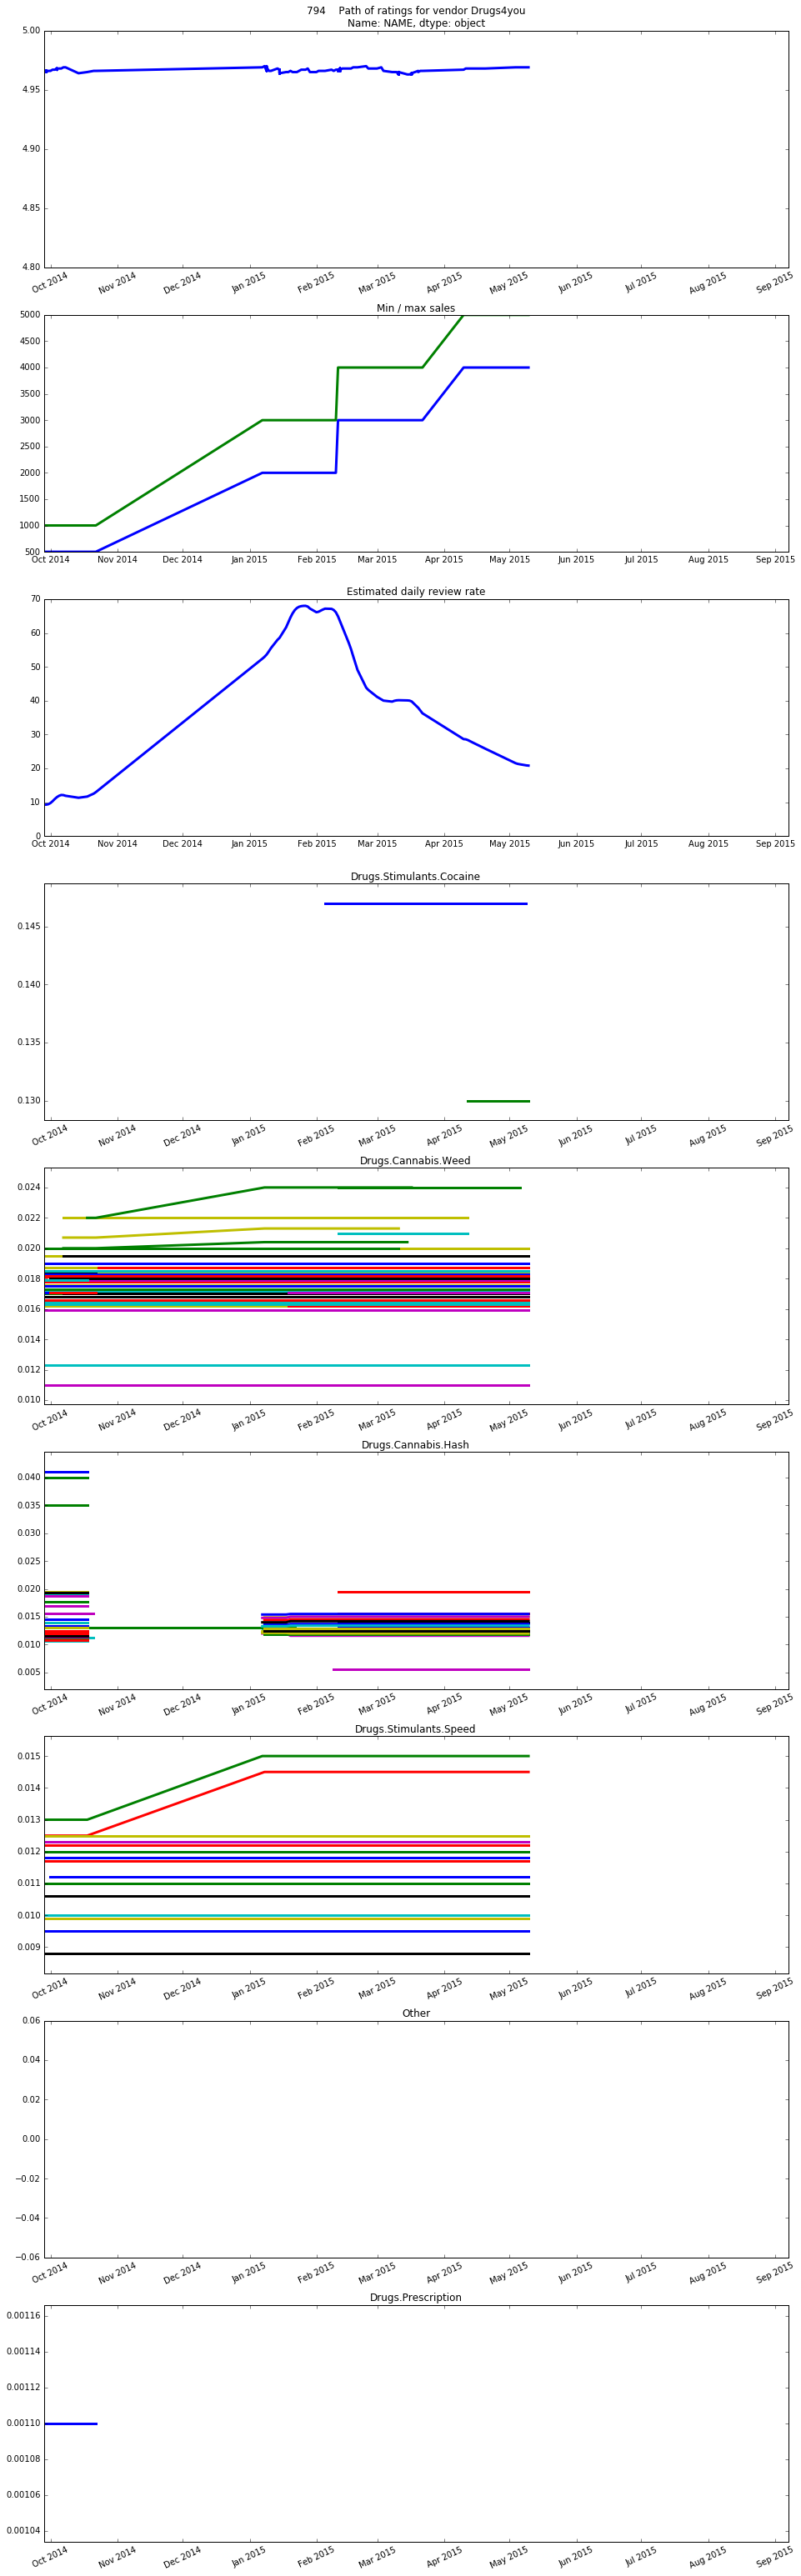

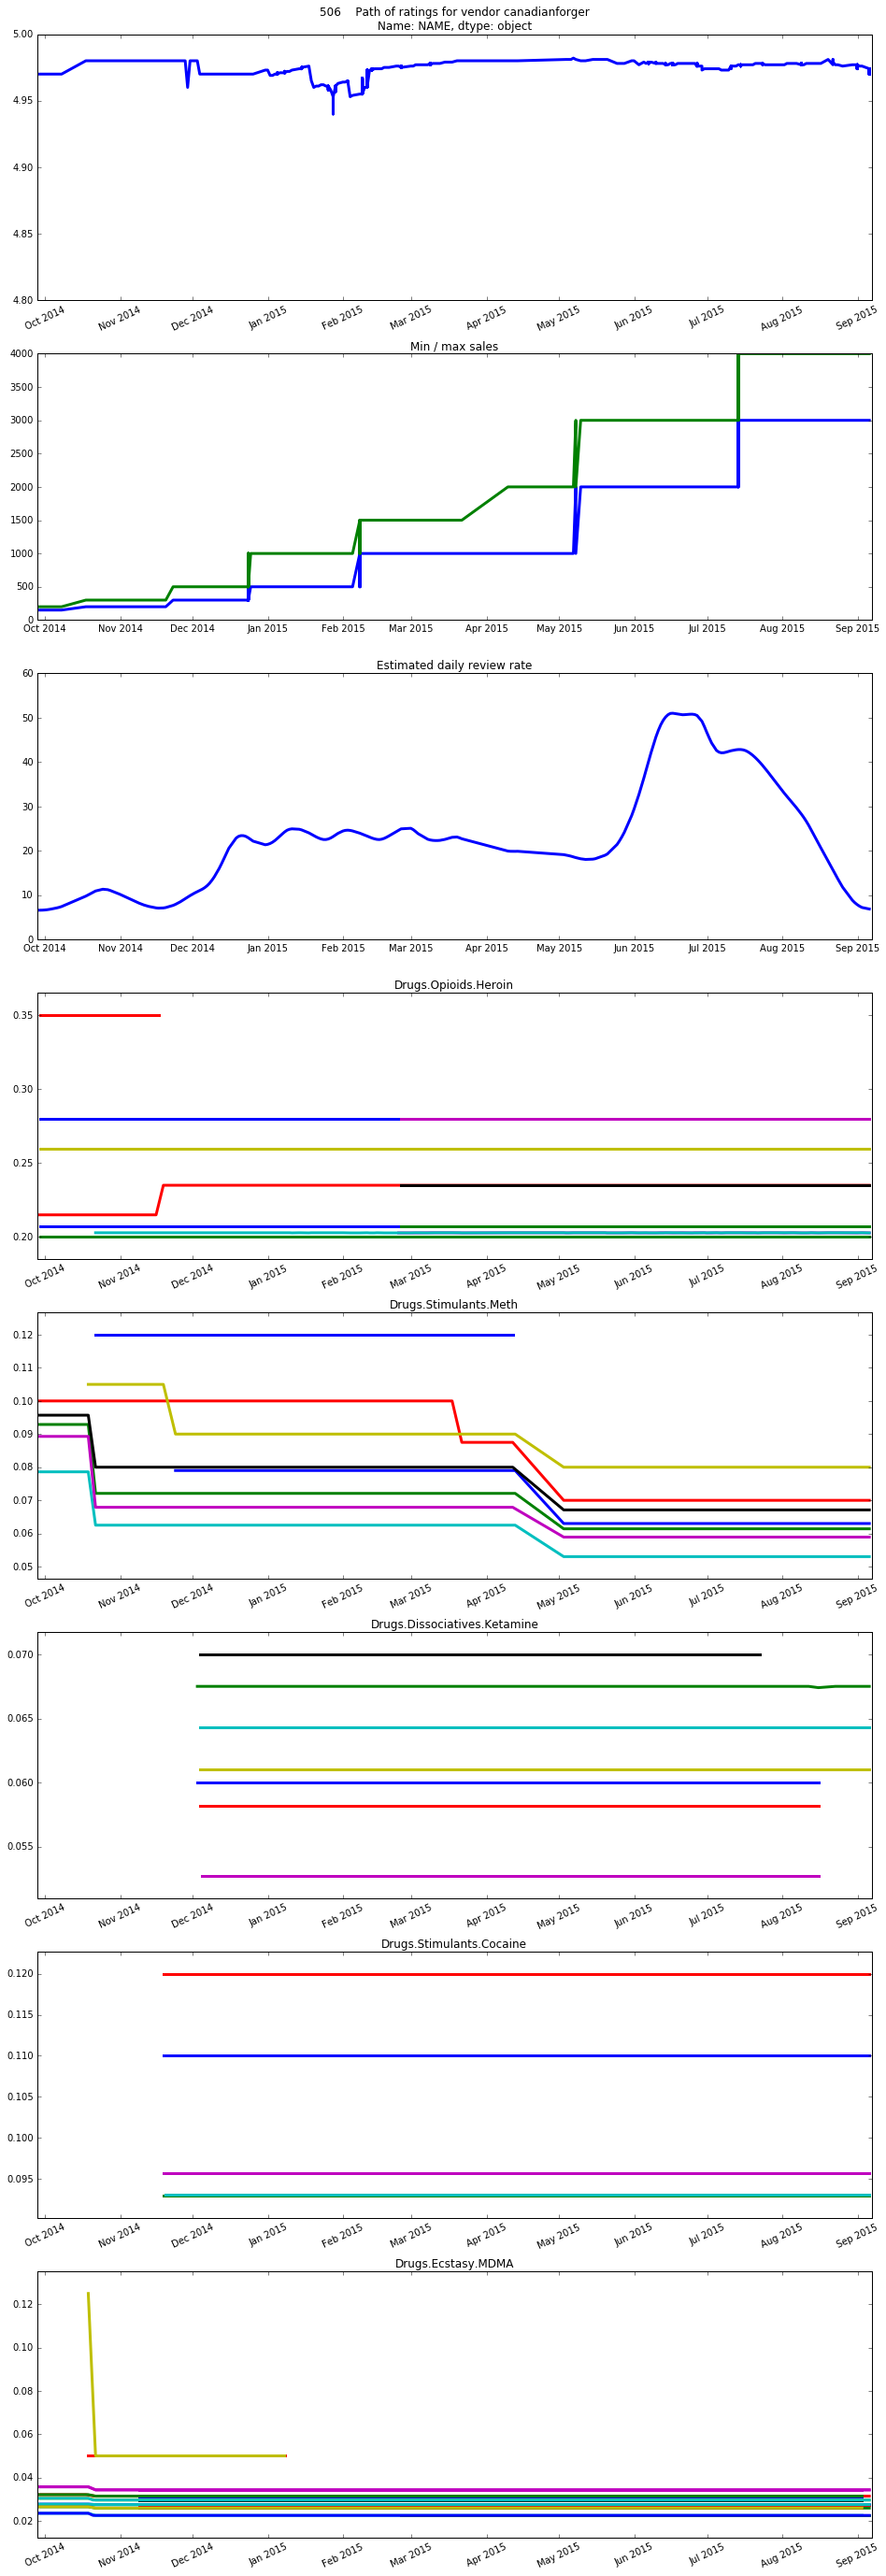

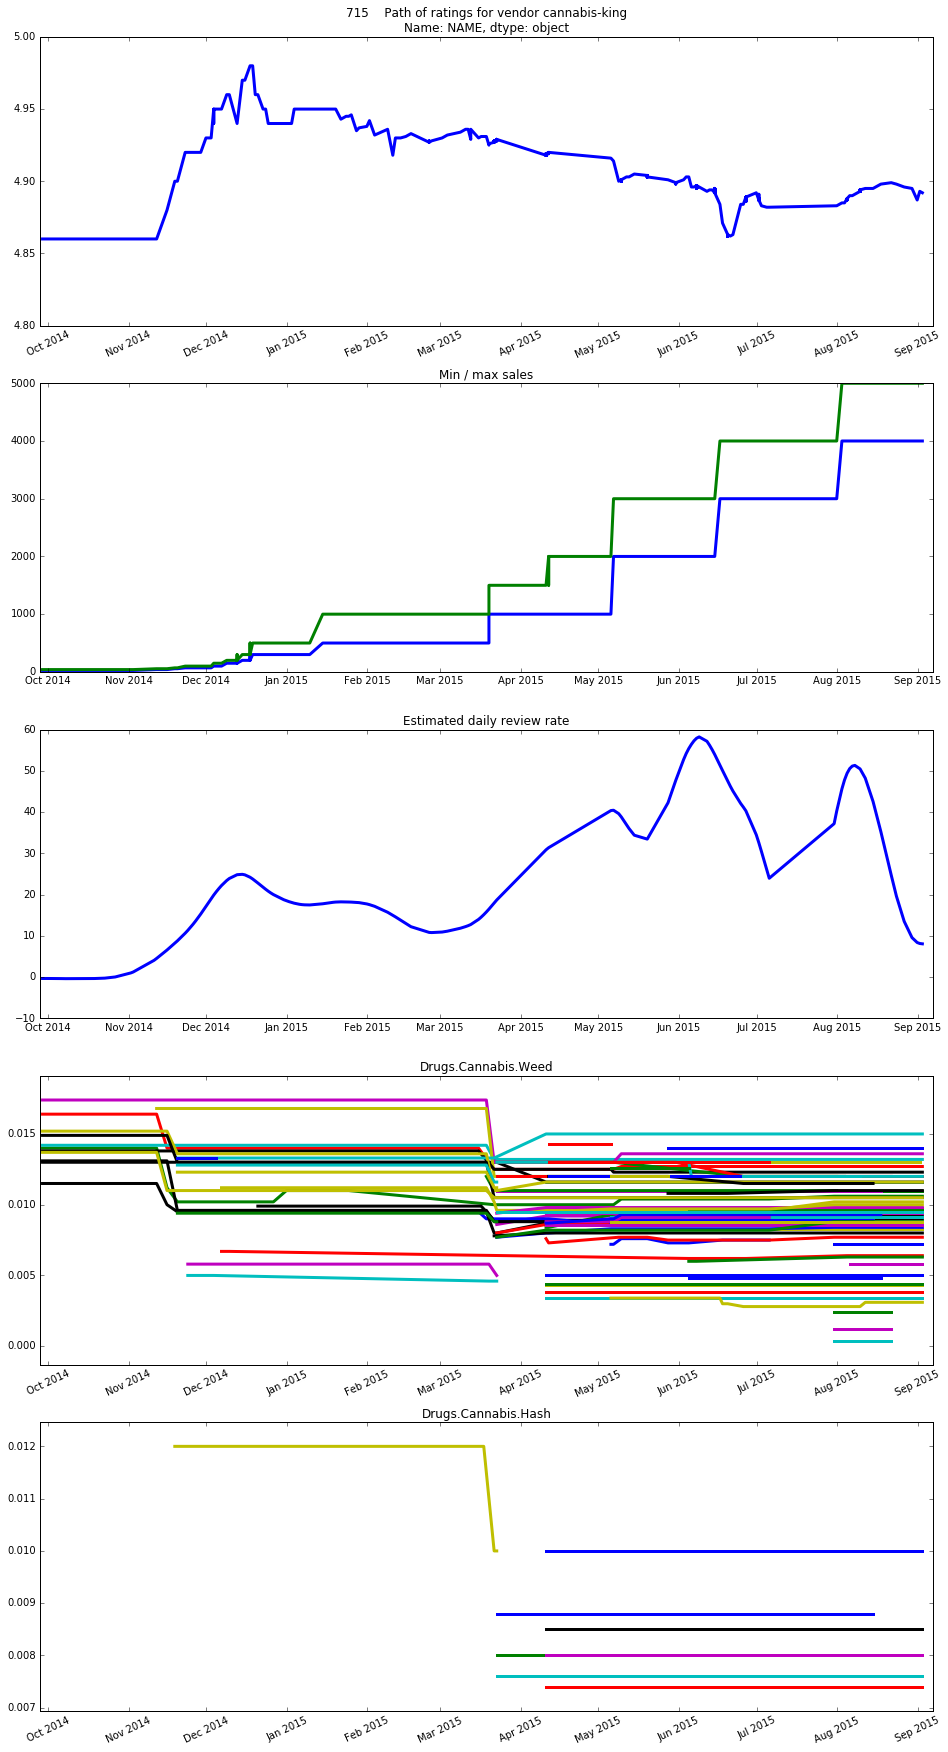

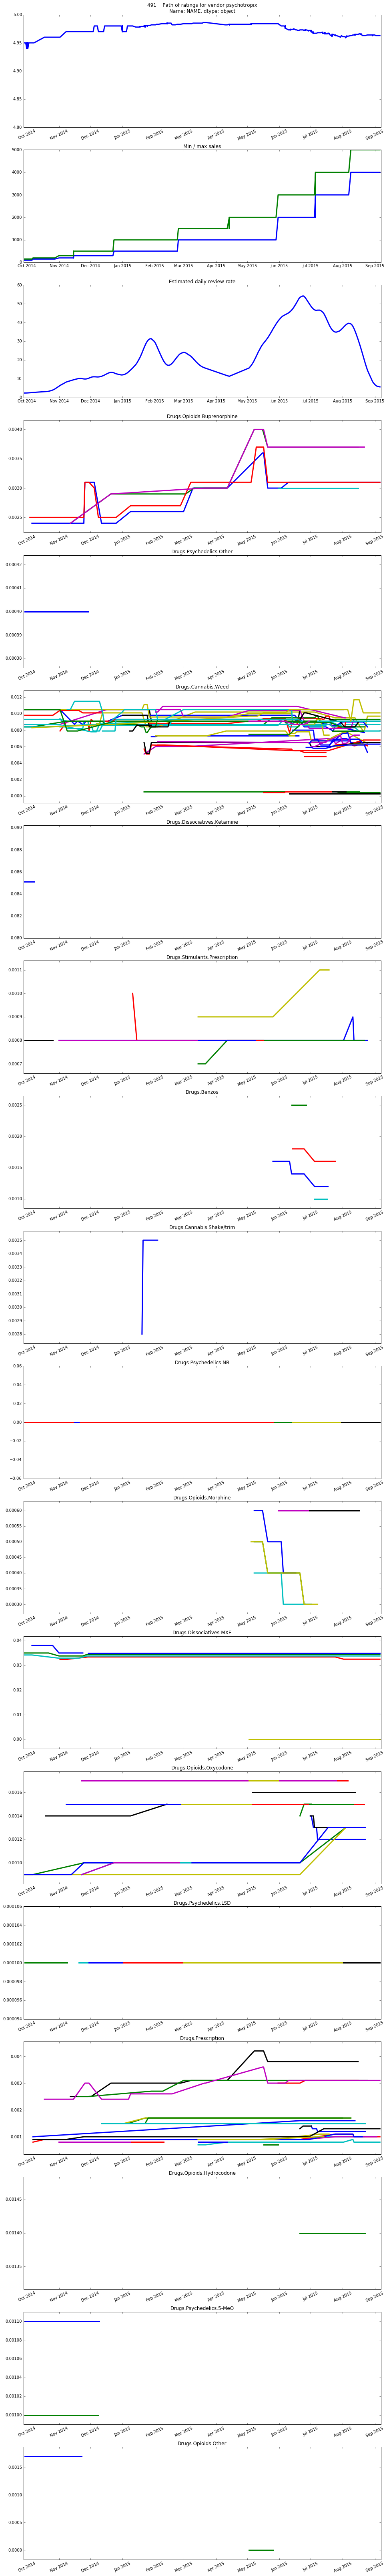

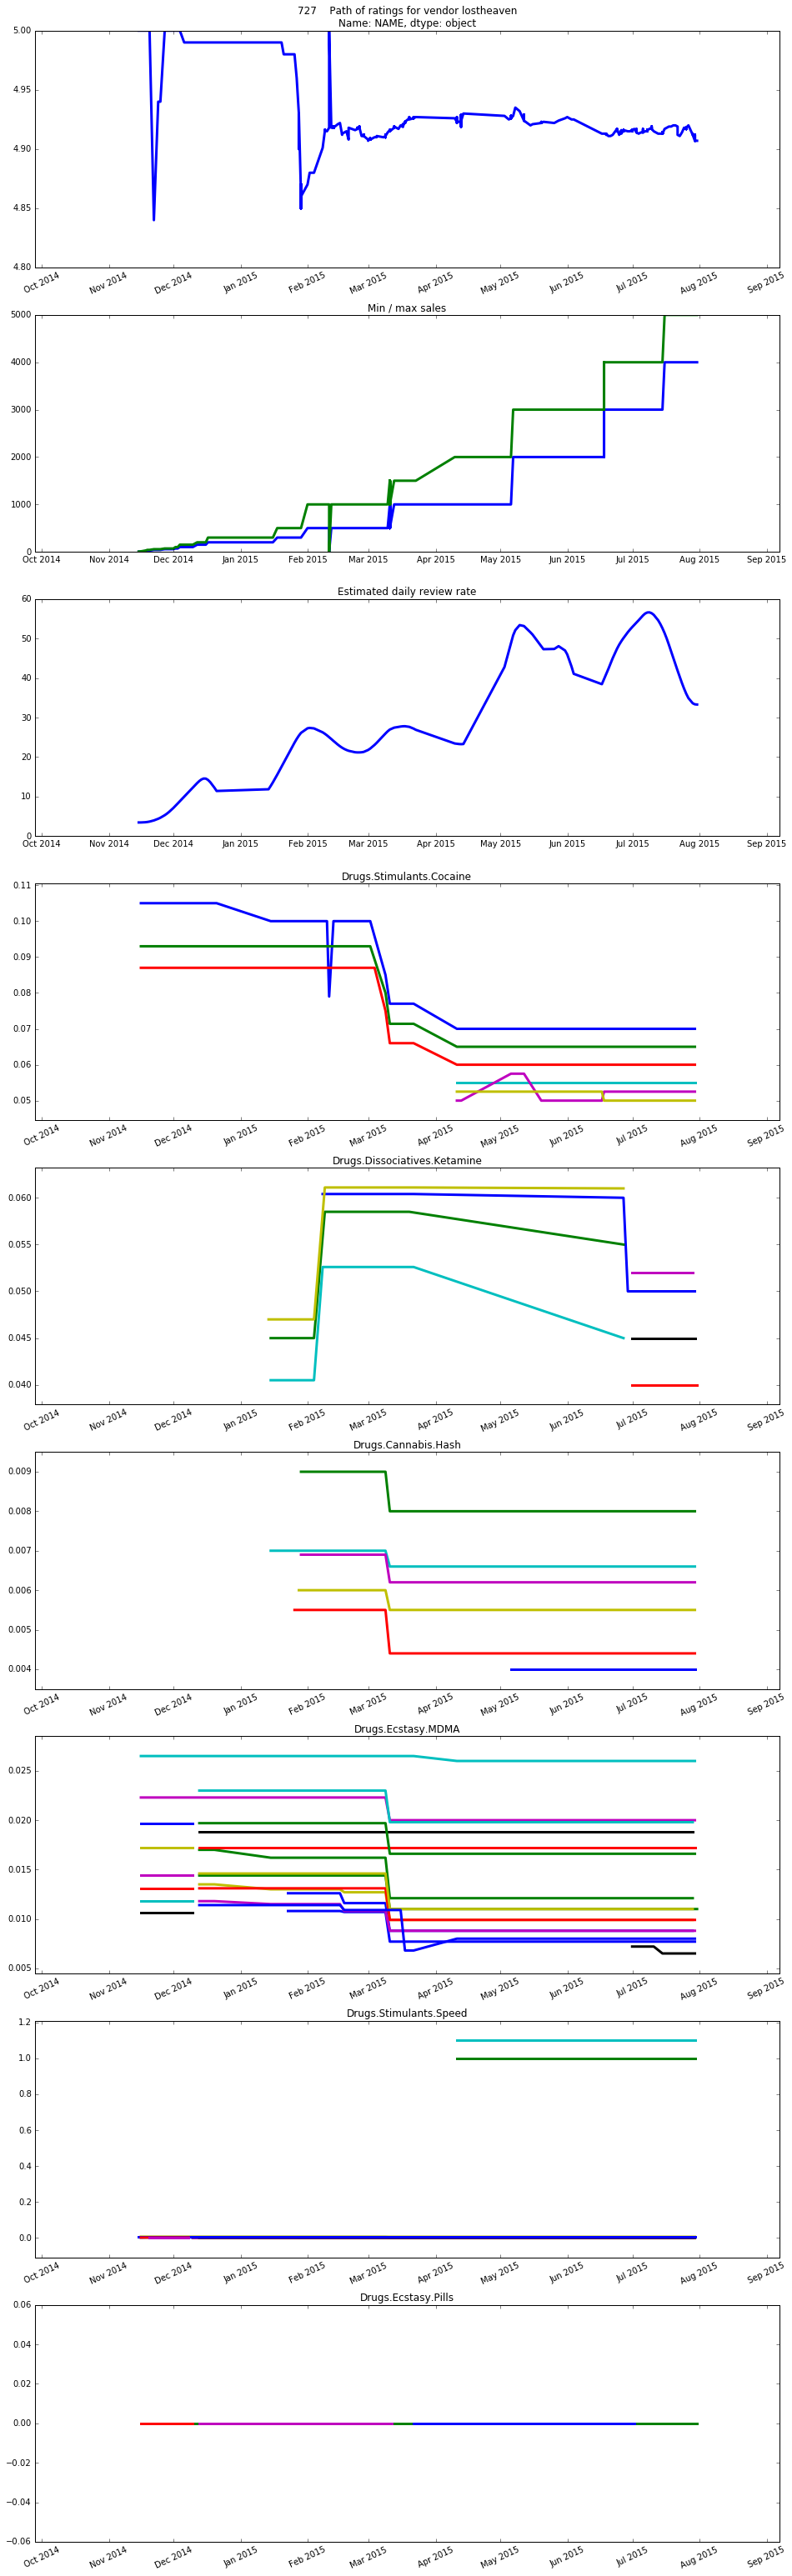

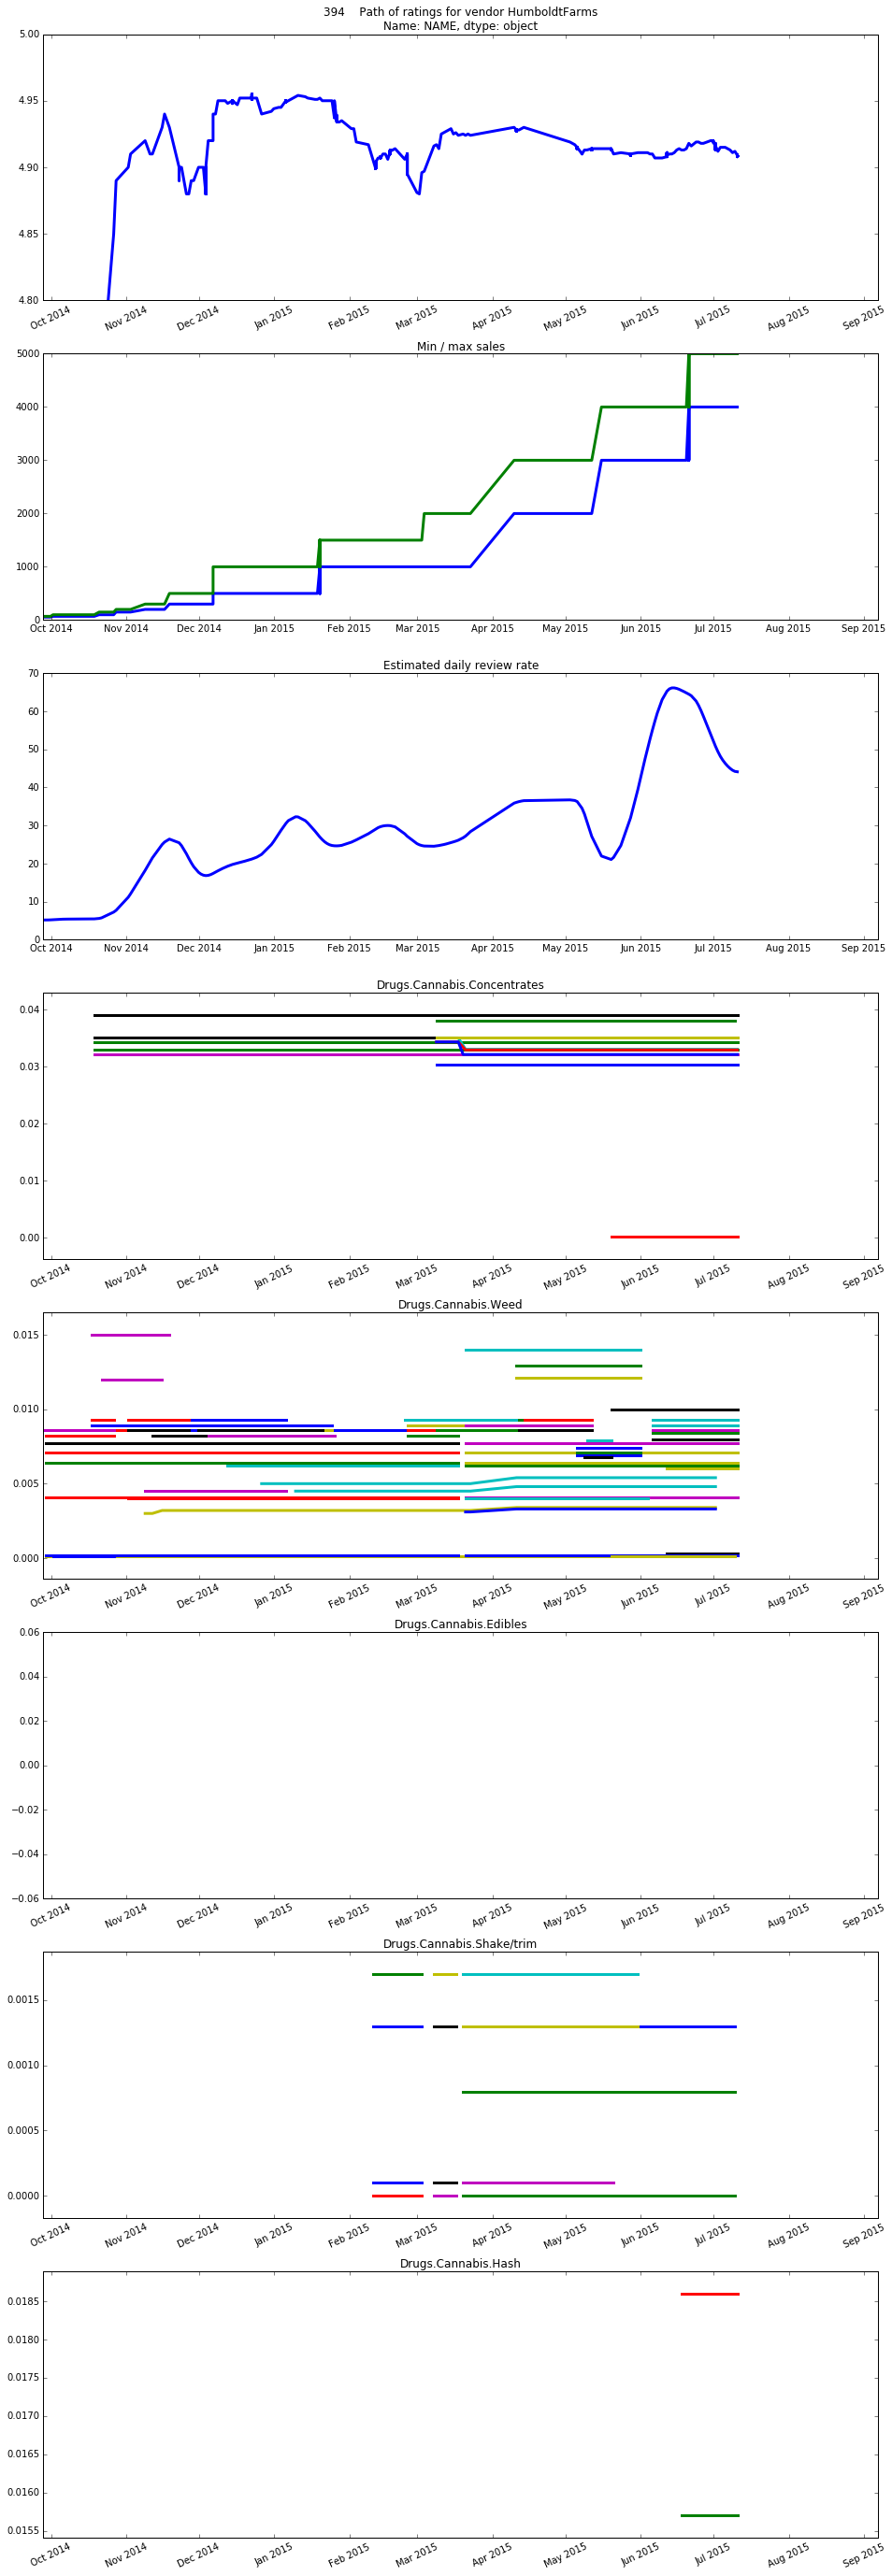

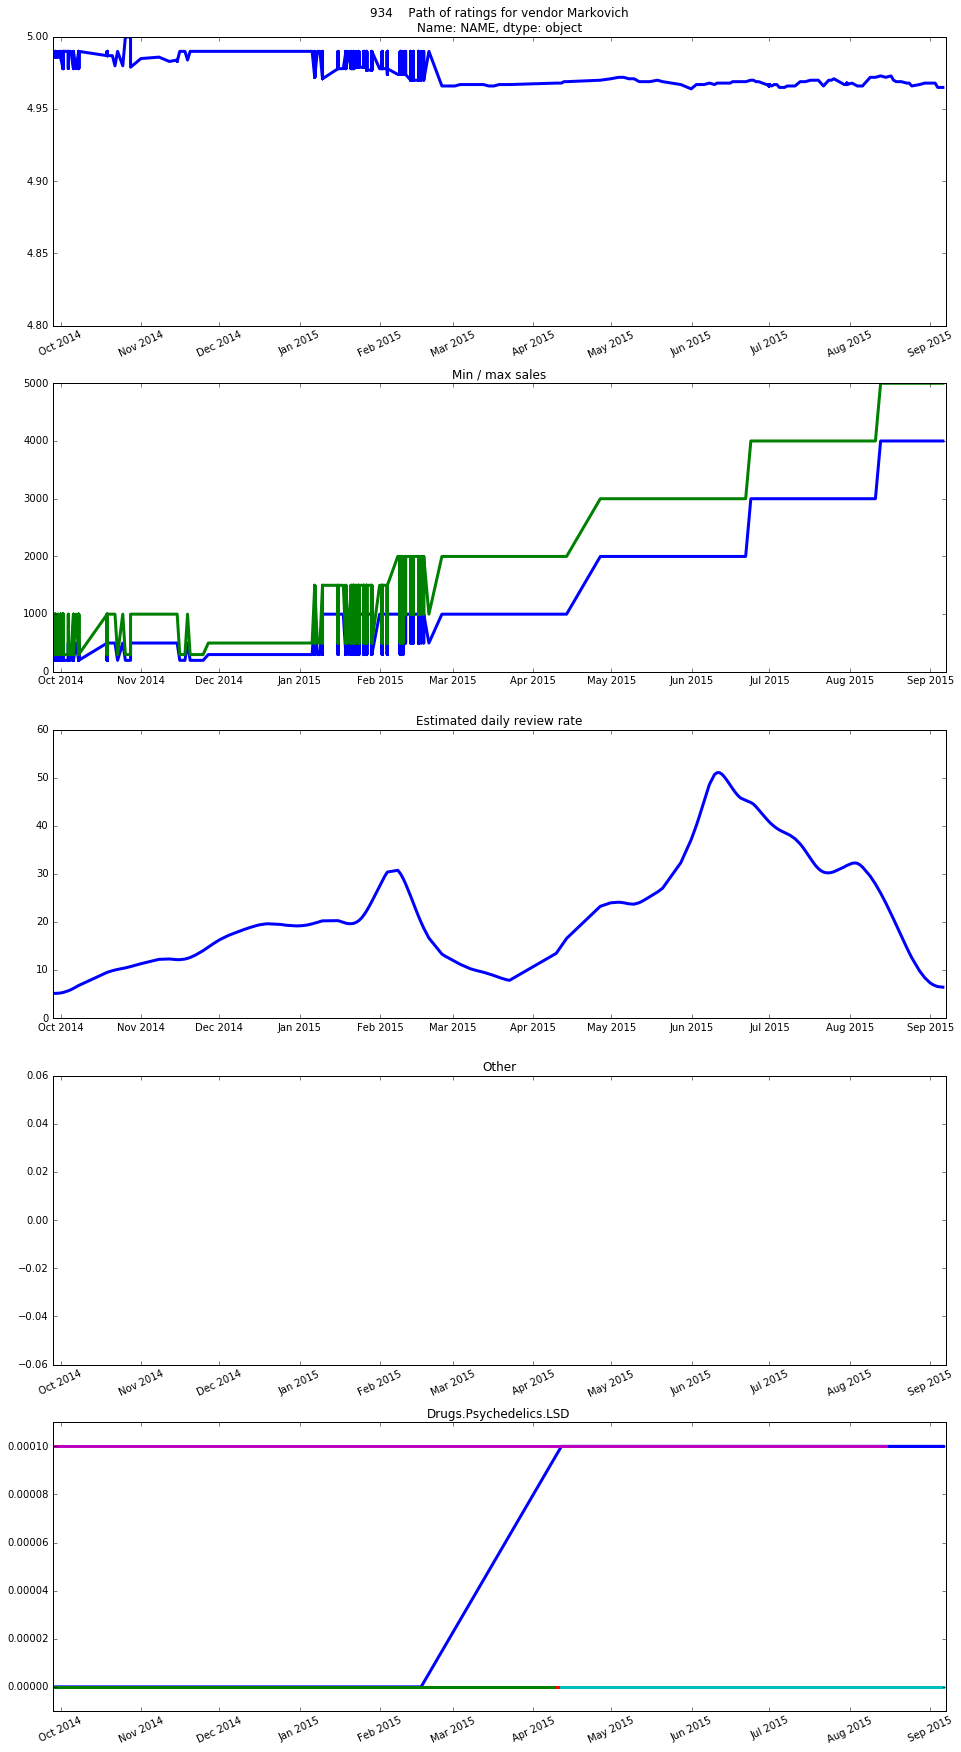

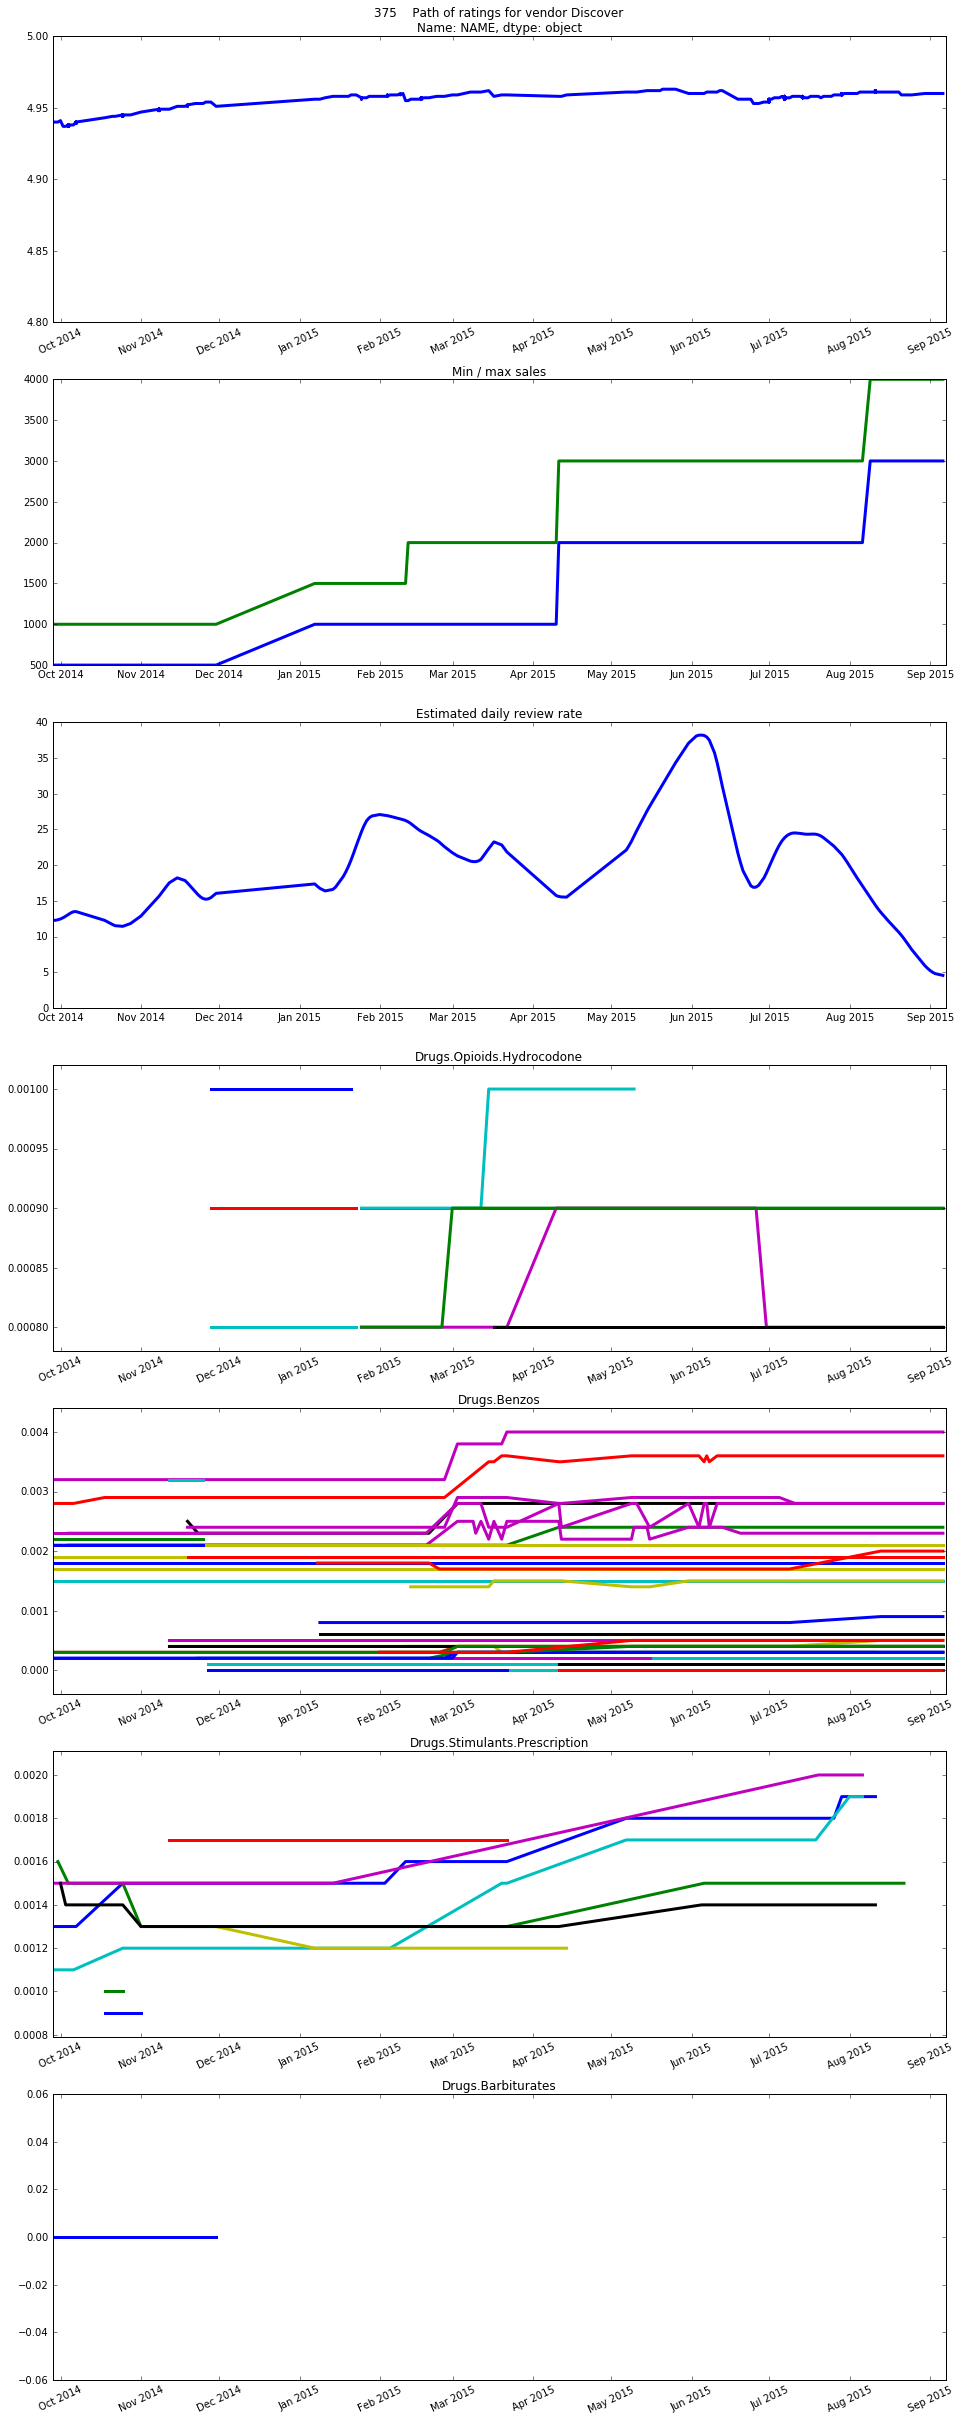

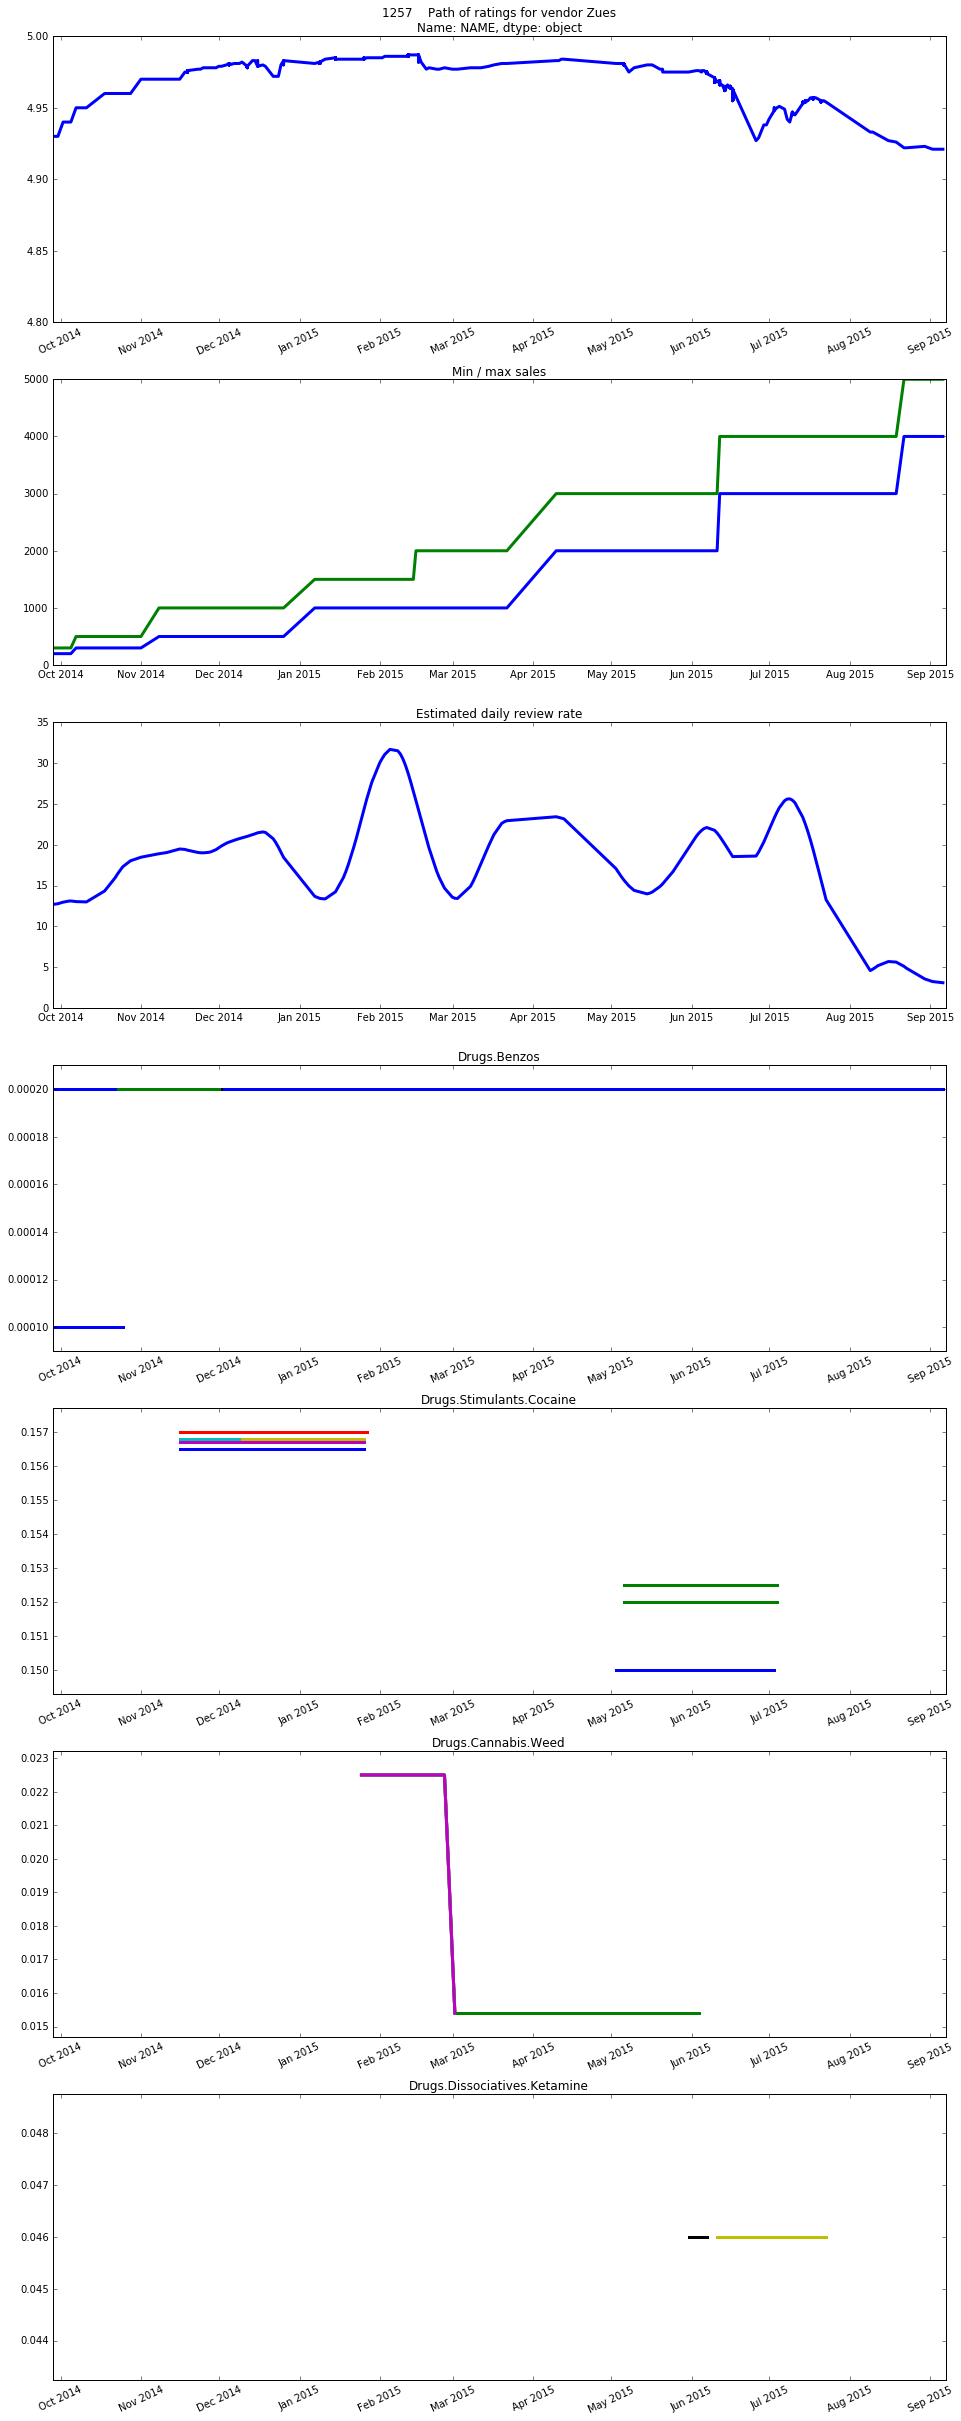

In [99]:
for vendor_id in top_vendors['ID']:
    
    listings_all = listings[listings['VENDOR'] == vendor_id]
    prices_all = prices[prices['VENDOR'] == vendor_id]
    num_listings = len(listings_all)

    unique_categories = len(set(listings_all['CATEGORY']))

    fig, axes = plt.subplots(nrows = unique_categories + 3, ncols = 1, figsize = (16, (unique_categories + 3)*6))

    dateval = prices_all[['DATE', 'RATING']]
    dateval = dateval.sort_values('DATE', ascending = True)
    vals = [r for r in dateval['RATING']]
    dates = dateval['DATE']*86400
    dates  = [datetime.datetime.fromtimestamp(d) for d in dates]
    axes[0].plot(dates, vals, linewidth = 3)
    axes[0].fmt_xdata = mdates.DateFormatter('%m-%d')
    axes[0].set_title("Path of ratings for vendor " + vendors[vendors['ID'] == vendor_id]['NAME'])
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=25)
    axes[0].set_xlim(min_date, max_date)
    axes[0].set_ylim(4.8, 5)

    dateval = prices_all[['DATE', 'MIN_SALES']]
    dateval = dateval.sort_values('DATE', ascending = True)
    vals = [r for r in dateval['MIN_SALES']]
    dates = dateval['DATE']*86400
    dates  = [datetime.datetime.fromtimestamp(d) for d in dates]
    axes[1].plot(dates, vals, linewidth = 3)
    dateval = prices_all[['DATE', 'MAX_SALES']]
    dateval = dateval.sort_values('DATE', ascending = True)
    vals = [r for r in dateval['MAX_SALES']]
    dates = dateval['DATE']*86400
    dates  = [datetime.datetime.fromtimestamp(d) for d in dates]
    axes[1].plot(dates, vals, linewidth = 3)
    axes[1].fmt_xdata = mdates.DateFormatter('%m-%d')
    axes[1].set_title("Min / max sales")
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=25)
    axes[1].set_xlim(min_date, max_date)

    dateval = prices_all[['DATE', 'V_REVIEWS_PER_DAY']]
    dateval = dateval.sort_values('DATE', ascending = True)
    vals = [r for r in dateval['V_REVIEWS_PER_DAY']]
    dates = dateval['DATE']*86400
    dates  = [datetime.datetime.fromtimestamp(d) for d in dates]
    axes[2].plot(dates, vals, linewidth = 3)
    axes[2].fmt_xdata = mdates.DateFormatter('%m-%d')
    axes[2].set_title("Estimated daily review rate")
    plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=25)
    axes[2].set_xlim(min_date, max_date)

    i = 3
    for c in set(listings_all['CATEGORY']):

        for l in listings_all[listings_all['CATEGORY'] == c]['ID']:
            normalized = prices_all[prices_all['LISTING'] == l]
            vals = [around(p, decimals = 4) for p in normalized['NORMALIZED']]
            dates = normalized['DATE']*86400
            dates  = [datetime.datetime.fromtimestamp(d) for d in dates]

            axes[i].plot(dates, vals, label = "label", linewidth = 3)

        axes[i].fmt_xdata = mdates.DateFormatter('%m-%d')
        axes[i].set_title(categories[c - 1][0])
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=25)
        axes[i].set_xlim(min_date, max_date)
        axes[i].margins(y = 0.1)
        i = i + 1